In [1]:
import pandas as pd
import numpy as np
from datetime import datetime as dt
import calendar
import seaborn as sns
%matplotlib inline
from matplotlib import rcParams
import warnings
warnings.filterwarnings('ignore') #remove warning

In [2]:
df = pd.read_csv("https://media.githubusercontent.com/media/DBertazioli/NeoMeetup/master/csv/exported_queries/Distribuzione_temporale_eventi_fix_with_members_replica.csv")
df.tail()

,Unnamed: 0,ID,country,state,partecipanti,lat,lon,timezone_str,time,datetime_timezoned
280908,280908,tnndrqyzgbcb,fr,fr,1,48.86,2.34,Europe/Paris,1554130800000,01/04/2019 17
280909,280909,259323127,il,il,2,32.07,34.77,Asia/Jerusalem,1554130800000,01/04/2019 18
280910,280910,260175682,us,fl,1,28.14,-82.61,America/New_York,1554130800000,01/04/2019 11
280911,280911,260102972,us,az,1,32.09,-111.07,America/Phoenix,1554130800000,01/04/2019 08
280912,280912,dlqzpqyzgbcb,us,co,1,39.70,-105.08,America/Denver,1554129000000,01/04/2019 09


In [3]:
tmp = df['datetime_timezoned'].str.split(" ", n = 1, expand = True) #create distinct columns date and time
df['day'] = [calendar.day_name[dt.strptime(date, '%d/%m/%Y').weekday()] for date in tmp[0]] #transform date into day
df['dtime'] = tmp[1] #take time
df.head()

,Unnamed: 0,ID,country,state,partecipanti,lat,lon,timezone_str,time,datetime_timezoned,day,dtime
0,0,260269871,us,ca,1,33.87,-118.33,America/Los_Angeles,5317552800000,04/07/2138 10,Friday,10
1,1,260260779,us,wa,2,47.67,-117.43,America/Los_Angeles,3384554400000,01/04/2077 18,Thursday,18
2,2,ztbltqyxcdbbc,us,tn,1,36.08,-86.72,America/Chicago,2150290800000,20/02/2038 09,Saturday,09
3,3,260361735,sg,sg,1,1.30,103.85,Asia/Singapore,1924992000000,01/01/2031 08,Wednesday,08
4,4,260337211,sg,sg,1,1.30,103.85,Asia/Singapore,1924992000000,01/01/2031 08,Wednesday,08


In [4]:
df_date = df[['day','dtime']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime
0,Friday,10
1,Thursday,18
2,Saturday,09
3,Wednesday,08
4,Wednesday,08


In [5]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table

dtime,00,01,02,03,04,05,06,07,08,09,...,14,15,16,17,18,19,20,21,22,23
day,,,,,,,,,,,,,,,,,,,,,
Monday,56,10,4,2,5,12,81,171,266,678,...,279,286,367,841,4776,10332,2766,472,104,17
Tuesday,45,4,3,3,5,31,82,516,951,1089,...,412,382,549,1467,9025,17002,4047,718,95,50
Wednesday,39,6,6,8,5,24,107,808,1099,1315,...,484,464,543,1568,9910,17734,4290,621,142,40
Thursday,52,9,4,2,4,31,106,612,1191,1188,...,542,473,664,1721,9620,17656,4331,861,198,71
Friday,121,10,4,7,12,22,112,427,754,1079,...,528,611,706,1494,4581,9104,4312,1330,646,182
Saturday,145,42,23,20,20,60,269,1041,2597,6183,...,4741,3330,2416,2271,3317,5701,3264,1072,663,215
Sunday,77,15,11,14,9,39,127,465,1210,2690,...,4384,3076,2232,2007,2158,2468,778,232,80,64


In [6]:
#only if are present nan or float 
#pivot_table = pivot_table.fillna(0)
#pivot_table = pivot_table.astype(int)

In [7]:
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size

Text(141,0.5,'Weekdays')

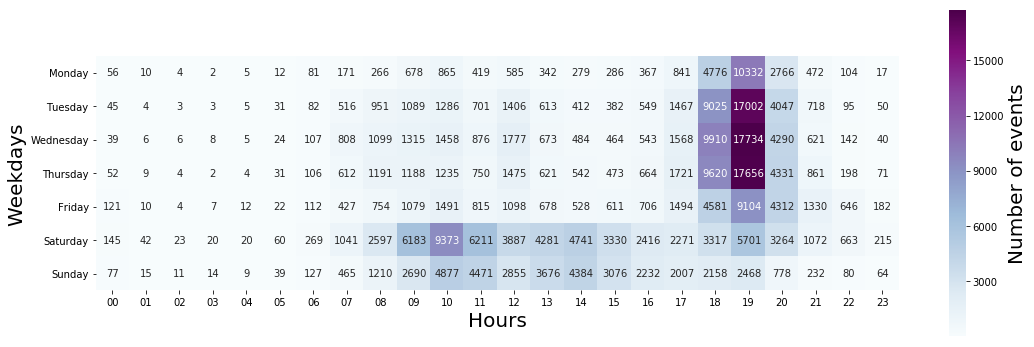

In [8]:
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)

In [9]:
#figure.figure.savefig("C:/Users/fabri/OneDrive/Desktop/heatmap.png")

In [10]:
df_date = df[['day','dtime', 'partecipanti']] #define new dataframe for explore with viz
df_date.head() #check

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [11]:
df_date['day'] = pd.Categorical(df_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week
df_date.head()

,day,dtime,partecipanti
0,Friday,10,1
1,Thursday,18,2
2,Saturday,09,1
3,Wednesday,08,1
4,Wednesday,08,1


In [12]:
df_day = df[['day','partecipanti']].groupby('day', as_index = False).sum()
df_time = df[['dtime', 'partecipanti']].groupby('dtime', as_index = False).sum()
df_day

,day,partecipanti
0,Friday,126261
1,Monday,101700
2,Saturday,268015
3,Sunday,157555
4,Thursday,210401
5,Tuesday,195264
6,Wednesday,212696


Text(0.5,0,'Participants')

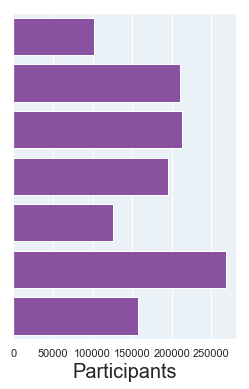

In [13]:
rcParams['figure.figsize'] = 4,6
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax1 = sns.barplot('partecipanti', 'day', data = df_day, color = '#8E44AD', order = ['Monday', 'Thursday', 'Wednesday',
                                                                               'Tuesday', 'Friday', 'Saturday', 'Sunday'])
ax1.set_ylabel('')
ax1.set(yticklabels = [])
ax1.set_xlabel("Participants", fontsize = 20)

Text(0,0.5,'Participants')

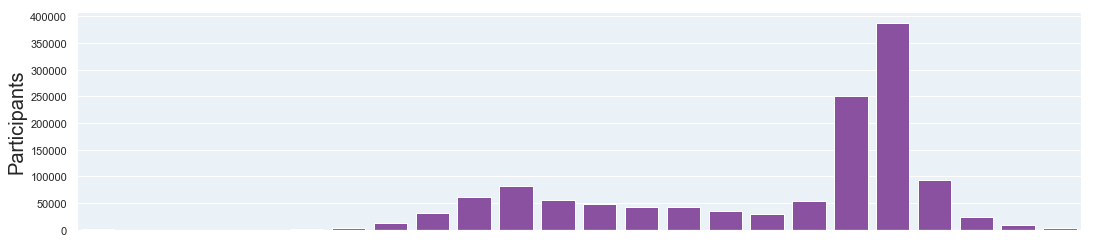

In [14]:
rcParams['figure.figsize'] = 18,4
sns.set(rc = {'axes.facecolor' : '#EAF2F8','axes.edgecolor' : 'white',
              'grid.linewidth': 1, 'grid.color':'white'})
sns.despine(left = True, bottom = True)
ax = sns.barplot('dtime', 'partecipanti', data = df_time, color = '#8E44AD')
ax.set_xlabel('')
ax.set(xticklabels = [])
ax.set_ylabel("Participants", fontsize = 20)

## Define European countries

In [24]:
df_ita = df[df.country == "it"] #european countries
df_de = df[df.country == "de"]
df_es = df[df.country == "es"]
df_fr = df[df.country == "fr"]
df_gb = df[df.country == "gb"]
df_nl = df[df.country == "nl"]
df_fi = df[df.country == "fi"]
df_pt = df[df.country == "pt"]
df_se = df[df.country == "se"]

## Italia

Text(138.453,0.5,'Weekdays')

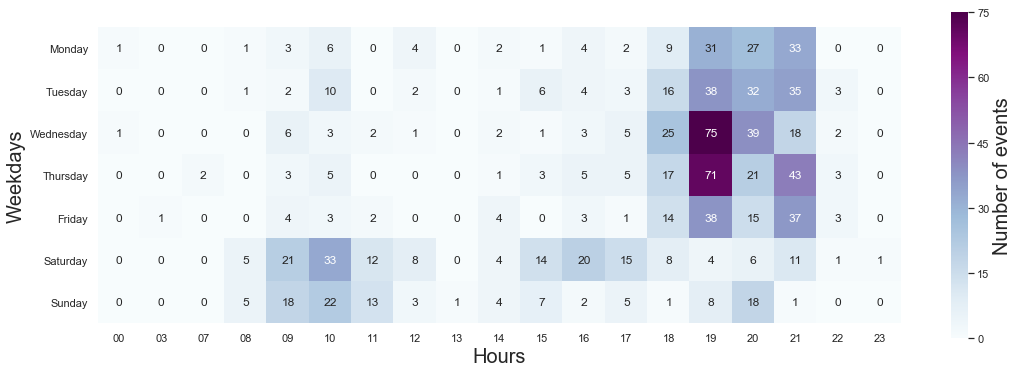

In [30]:
df_ita_date = df_ita[['day','dtime']] #define new dataframe for explore with viz
df_ita_date.head() #check
df_ita_date['day'] = pd.Categorical(df_ita_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_ita_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_ita_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)

## Germania

Text(138.453,0.5,'Weekdays')

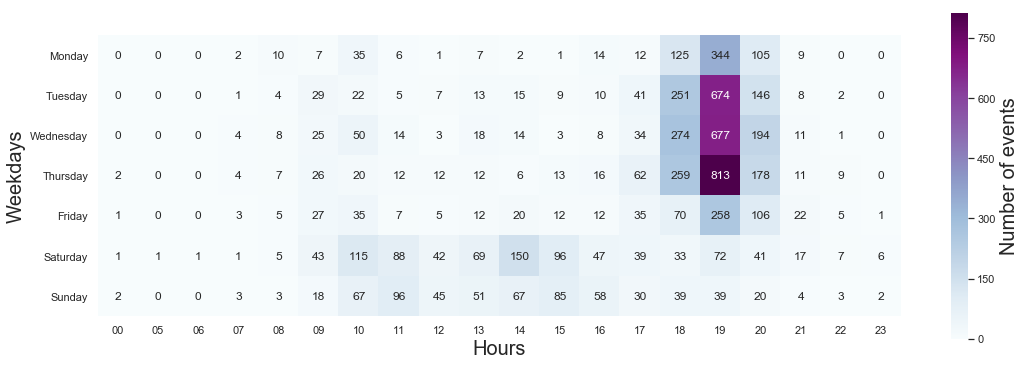

In [31]:
df_de_date = df_de[['day','dtime']] #define new dataframe for explore with viz
df_de_date.head() #check
df_de_date['day'] = pd.Categorical(df_de_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_de_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_de_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)

## Spagna

Text(138.453,0.5,'Weekdays')

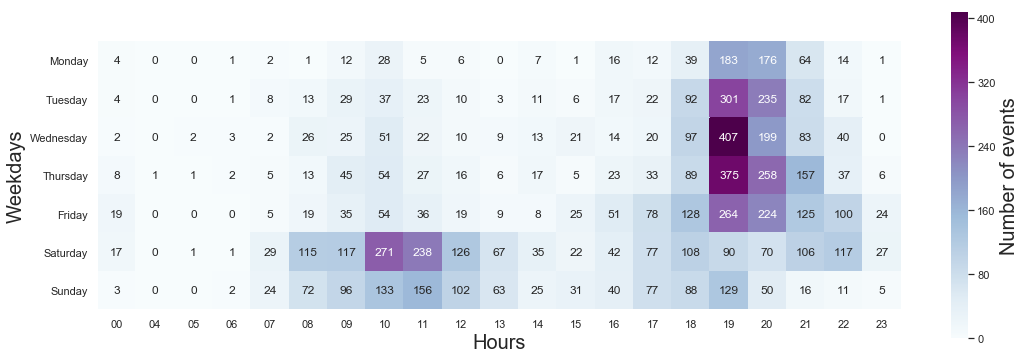

In [32]:
df_es_date = df_es[['day','dtime']] #define new dataframe for explore with viz
df_es_date.head() #check
df_es_date['day'] = pd.Categorical(df_es_date['day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
#sorting the days of the week 
df_es_date['values'] = 1 #create a column that represent the single instance
pivot_table = df_es_date.pivot_table(values = 'values', index = 'day', columns = 'dtime', aggfunc = np.sum)
#using the representation of the value we can use np.sum to calculate the number event is organized in a certain
#week's day, in a certain hour
pivot_table
pivot_table = pivot_table.fillna(0)
pivot_table = pivot_table.astype(int)
rcParams['figure.figsize'] = 18,12 #define a parameter to change the figure size
figure = sns.heatmap(pivot_table,cmap='BuPu', square = True, cbar_kws={"shrink": 0.5, 'label': 'Number of events'},
                    annot=True, fmt='d') #define an heatmap to plot our pivot_table
figure.figure.axes[-1].yaxis.label.set_size(20)
figure.set_xlabel("Hours", fontsize=20)
figure.set_ylabel("Weekdays", fontsize=20)